# Capstone Project DSE-FT-May22-Online-Gr3

This is Group 3's '.ipynb' file type submission for the Interim Report of the Capston Project. It contains all the information and steps that are required to be done and processed via Jupyter Notebooks. 

All additional reports and supporting data can be found under their respective information heads in the Interim Report PDF File,submitted along with this file. 

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, explained_variance_score
!pip install imblearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, explained_variance_score
import sklearn
from   sklearn.metrics import  confusion_matrix,roc_curve,auc
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix , classification_report, roc_curve, auc,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import xgboost

In [2]:
from imblearn.over_sampling import SMOTE

#### Importing the Data

In [3]:
df = pd.read_csv('Training Data.csv')

In [4]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


## Dataset and Domain

#### Variable categorization (count of numeric and categorical)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
df.select_dtypes(include = 'object').head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [7]:
df.select_dtypes(include = 'number').head()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,3,13,0
1,2,7574516,40,10,9,13,0
2,3,3991815,66,4,4,10,0
3,4,6256451,41,2,2,12,1
4,5,5768871,47,11,3,14,1


Inferences:
    
    -->Number of Catagorical Columns : 6
    
    -->Number of Numerical Columns : 7 of which one is our target variable

#### Pre Processing Data Analysis (count of missing/ null values, redundant columns, etc.)

<b>Null or Missing Values</b>

In [8]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<b>Redundant Columns</b>

In [9]:
k = df.columns
for i in k:
    print('Column Name:',i)
    print('Number of Unique Variables in',i,'is: ',df[i].nunique())

Column Name: Id
Number of Unique Variables in Id is:  252000
Column Name: Income
Number of Unique Variables in Income is:  41920
Column Name: Age
Number of Unique Variables in Age is:  59
Column Name: Experience
Number of Unique Variables in Experience is:  21
Column Name: Married/Single
Number of Unique Variables in Married/Single is:  2
Column Name: House_Ownership
Number of Unique Variables in House_Ownership is:  3
Column Name: Car_Ownership
Number of Unique Variables in Car_Ownership is:  2
Column Name: Profession
Number of Unique Variables in Profession is:  51
Column Name: CITY
Number of Unique Variables in CITY is:  317
Column Name: STATE
Number of Unique Variables in STATE is:  29
Column Name: CURRENT_JOB_YRS
Number of Unique Variables in CURRENT_JOB_YRS is:  15
Column Name: CURRENT_HOUSE_YRS
Number of Unique Variables in CURRENT_HOUSE_YRS is:  5
Column Name: Risk_Flag
Number of Unique Variables in Risk_Flag is:  2


As obvious, ID is a unique variable to every entry and does not assist our model in any way since it has 25200 unique values. We must therefore drop it as it is a redundant variable.

In [10]:
df.drop(columns = ['Id'],axis = 1 ,inplace = True)

We have now dropped our redundant column and our data is ready for further processing.

## Exploratory Data Analysis

#### Converting and Labelling the Data

In [11]:
df.select_dtypes(include = 'object').head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


<b>These variables need to be encoded for further analysis and preprocessing</b>

In [12]:
le = LabelEncoder()
df['Married/Single'] = le.fit_transform(df['Married/Single'])
df['House_Ownership'] = le.fit_transform(df['House_Ownership'])
df['Car_Ownership'] = le.fit_transform(df['Car_Ownership'])
df['Profession'] = le.fit_transform(df['Profession'])
df['CITY'] = le.fit_transform(df['CITY'])
df['STATE'] = le.fit_transform(df['STATE'])

In [13]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


Our data has now been encoded and is ready for further analysis

#### Checking for multi-collinearity

<AxesSubplot:>

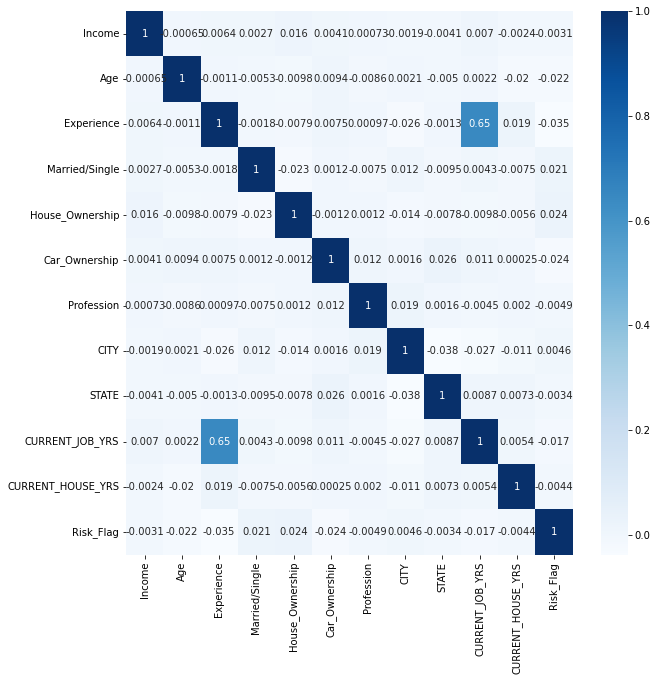

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

This correlation matrix shows us the overall correlation between the variables in the data. Although helpful as this does give us some insights into our data, we need to check for proper multicolleniarity in our training data. We do so in the following steps:
    
        -->Store the target column in a different variable and split the data into our independent and dependent variables
        
        -->Use the Variance Inflation Factor metric to assess the existence of multicolleniarty

In [15]:
X = df.drop(columns = ['Risk_Flag'], axis = 1)
Y = df['Risk_Flag']

In [16]:
#Checking for multicolleniarty in our independant variables
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Income,3.932711
1,Age,8.851960
2,Experience,6.547785
3,Married/Single,9.073366
4,House_Ownership,19.768821
5,Car_Ownership,1.430234
6,Profession,3.862300
7,CITY,3.845438
8,STATE,3.121924
9,CURRENT_JOB_YRS,6.853027


As visible, the variables House Ownership and Current House Years are highly correlated independant variables. This can hamper the accuracy and overall health of our machine learning models. We therefore remove the non-important variables from our dataset. Since our model is more classification in nature, we do not necessarily need to remove all multicollinear variables.

In [17]:
X.drop(columns = ['CURRENT_HOUSE_YRS'], axis = 1, inplace = True)

Our data is now ready for further analysis.

#### Checking the distribution of variables (Univariate Analysis)

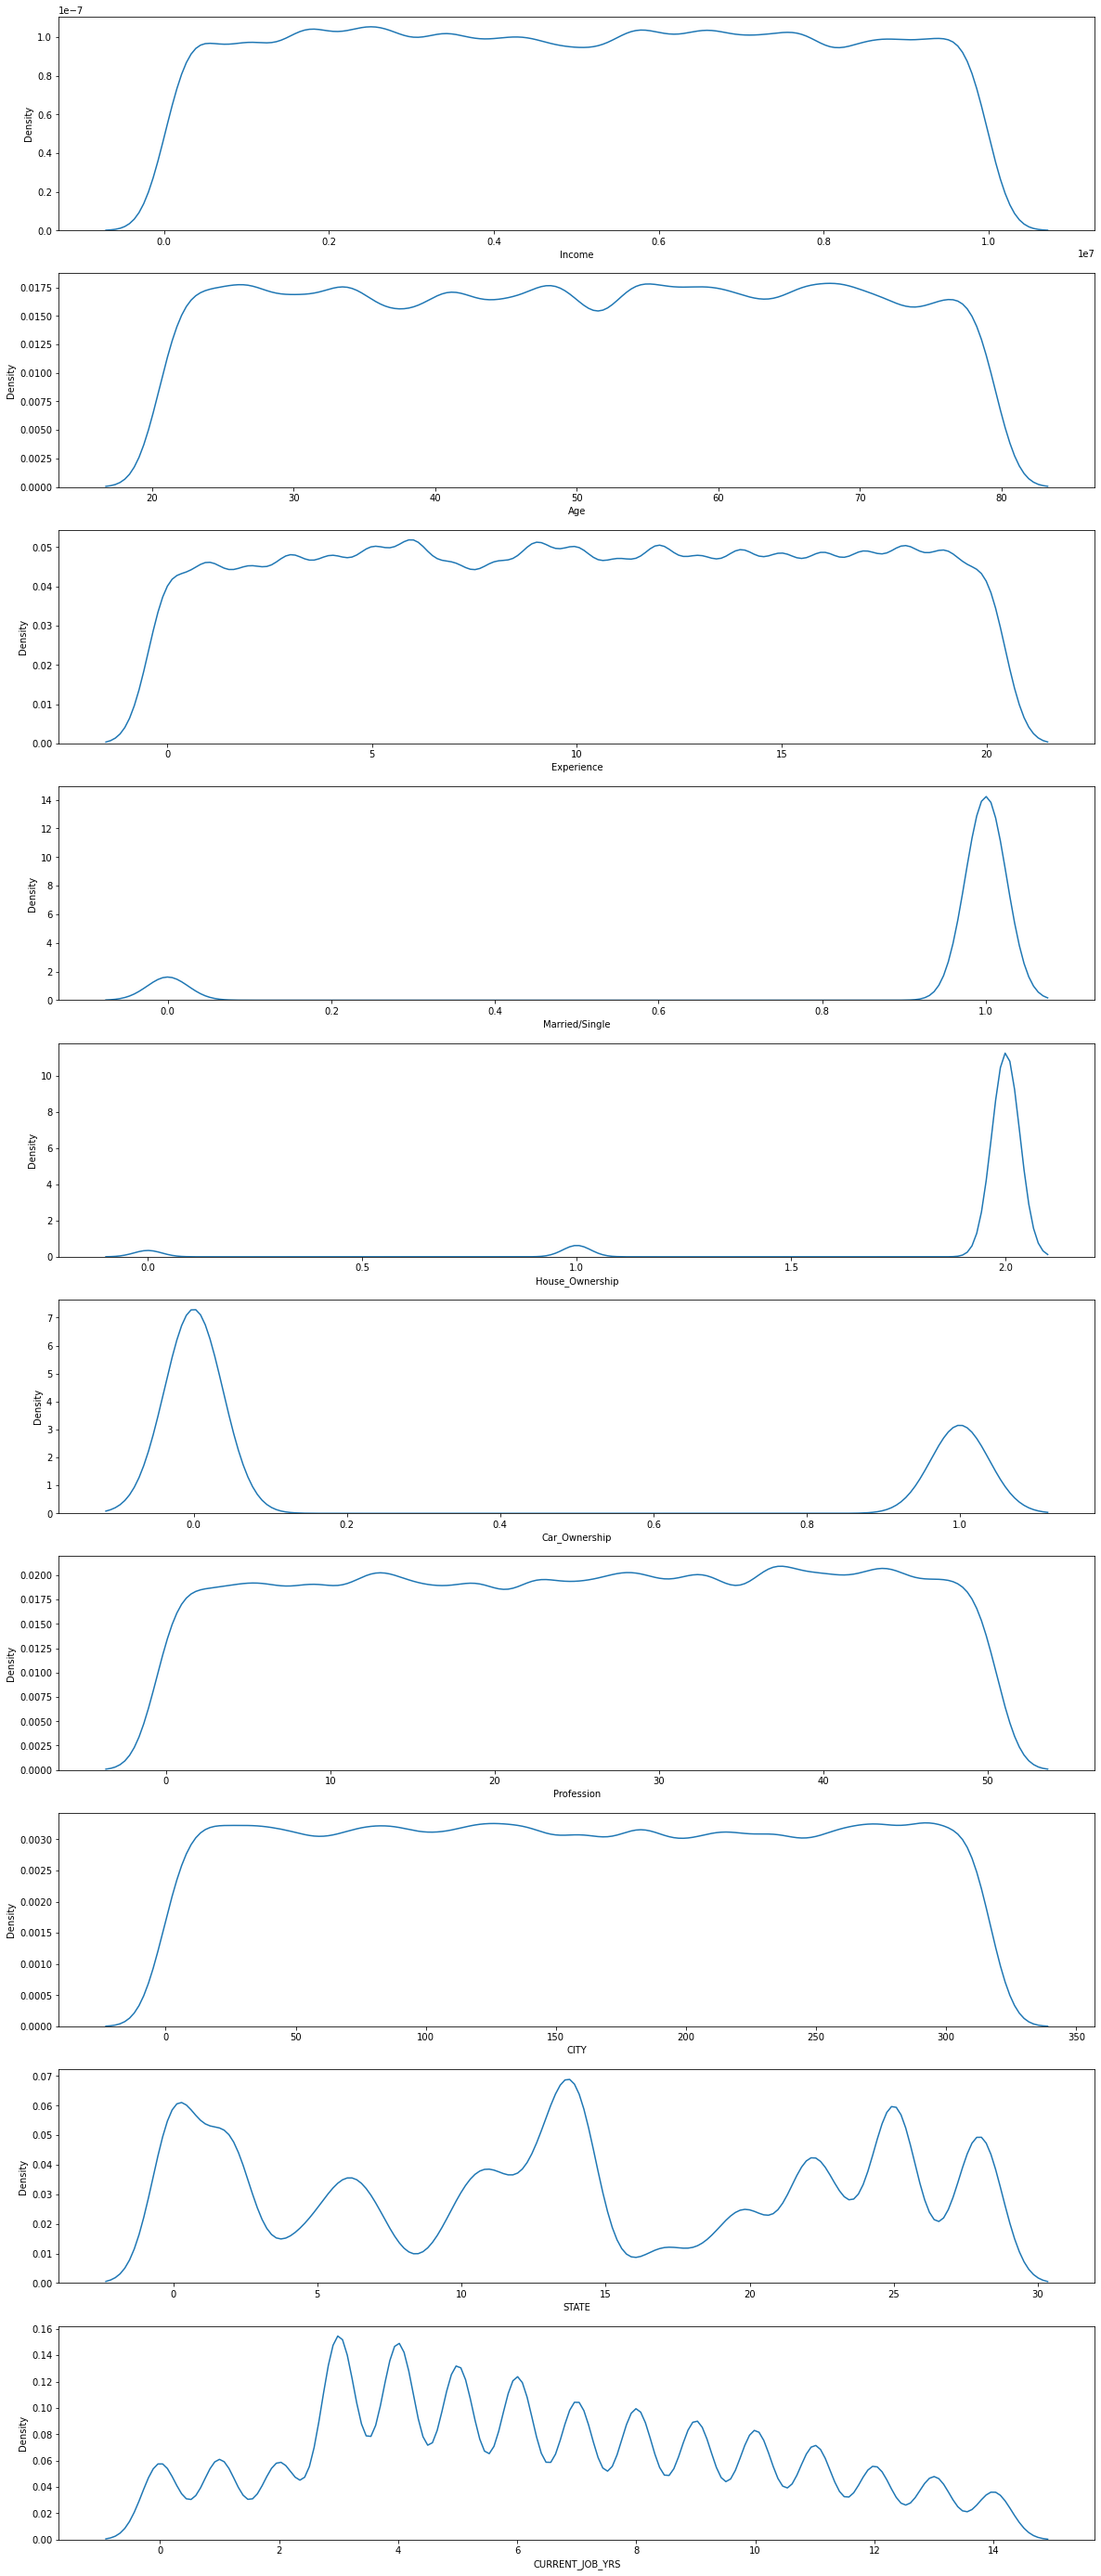

In [18]:
l = X.columns
plt.figure(figsize = (20,50))
for i in range(l.shape[0]):
    plt.subplot(l.shape[0],1,i+1)
    sns.kdeplot(X[l[i]])
    #plt.text(1, 1, l[i], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.xlabel(l[i])
plt.show()

Inferences :
        
        Income -- The data seems to be plateaued in the center. There appear to be no clusters, just a steep incline and 
        decline at the edges.
        
        Age -- Just as income, the data is plateaued, without the formation of any clusters
        
        Experince -- Like the other two variables, this data seems to be plateaued, but the data seems to have multiple 
        troughs which may be an indication of a factor of high variablitiy in the data.
        
        Car Ownership -- Since this is a Binary Catagorical Column, there can only be two possible clusters, although
        there is an obvious indication that more of the individuals fall in the 'Not Car Owners' Catagory
        
        Profession -- This variable too, like the rest of the data, seems to be plateaued, thus indicating that this
        is a characteristic followed by multiple continuous and catagorical variables in the data.
        
        CITY -- Again, this too is plateaud, indicating an even distribution in the city of origination of the candidates.
        
        STATE -- This data seems to have multiple clusters indicating that cadidate from some states apply for more loans 
        than others. This may or may-not introduce bias into our algorithm.
        
        Current Job Years -- This data examines the current number of years a candidate is working and has worked. It
        follows continuous wavelenght like patters which may indicate and even distribution. It is made obviously clear 
        that most candidates have approximately three years of experience after which the number of years starts to 
        decline.

#### Checking for the presence of outliers and their treatment

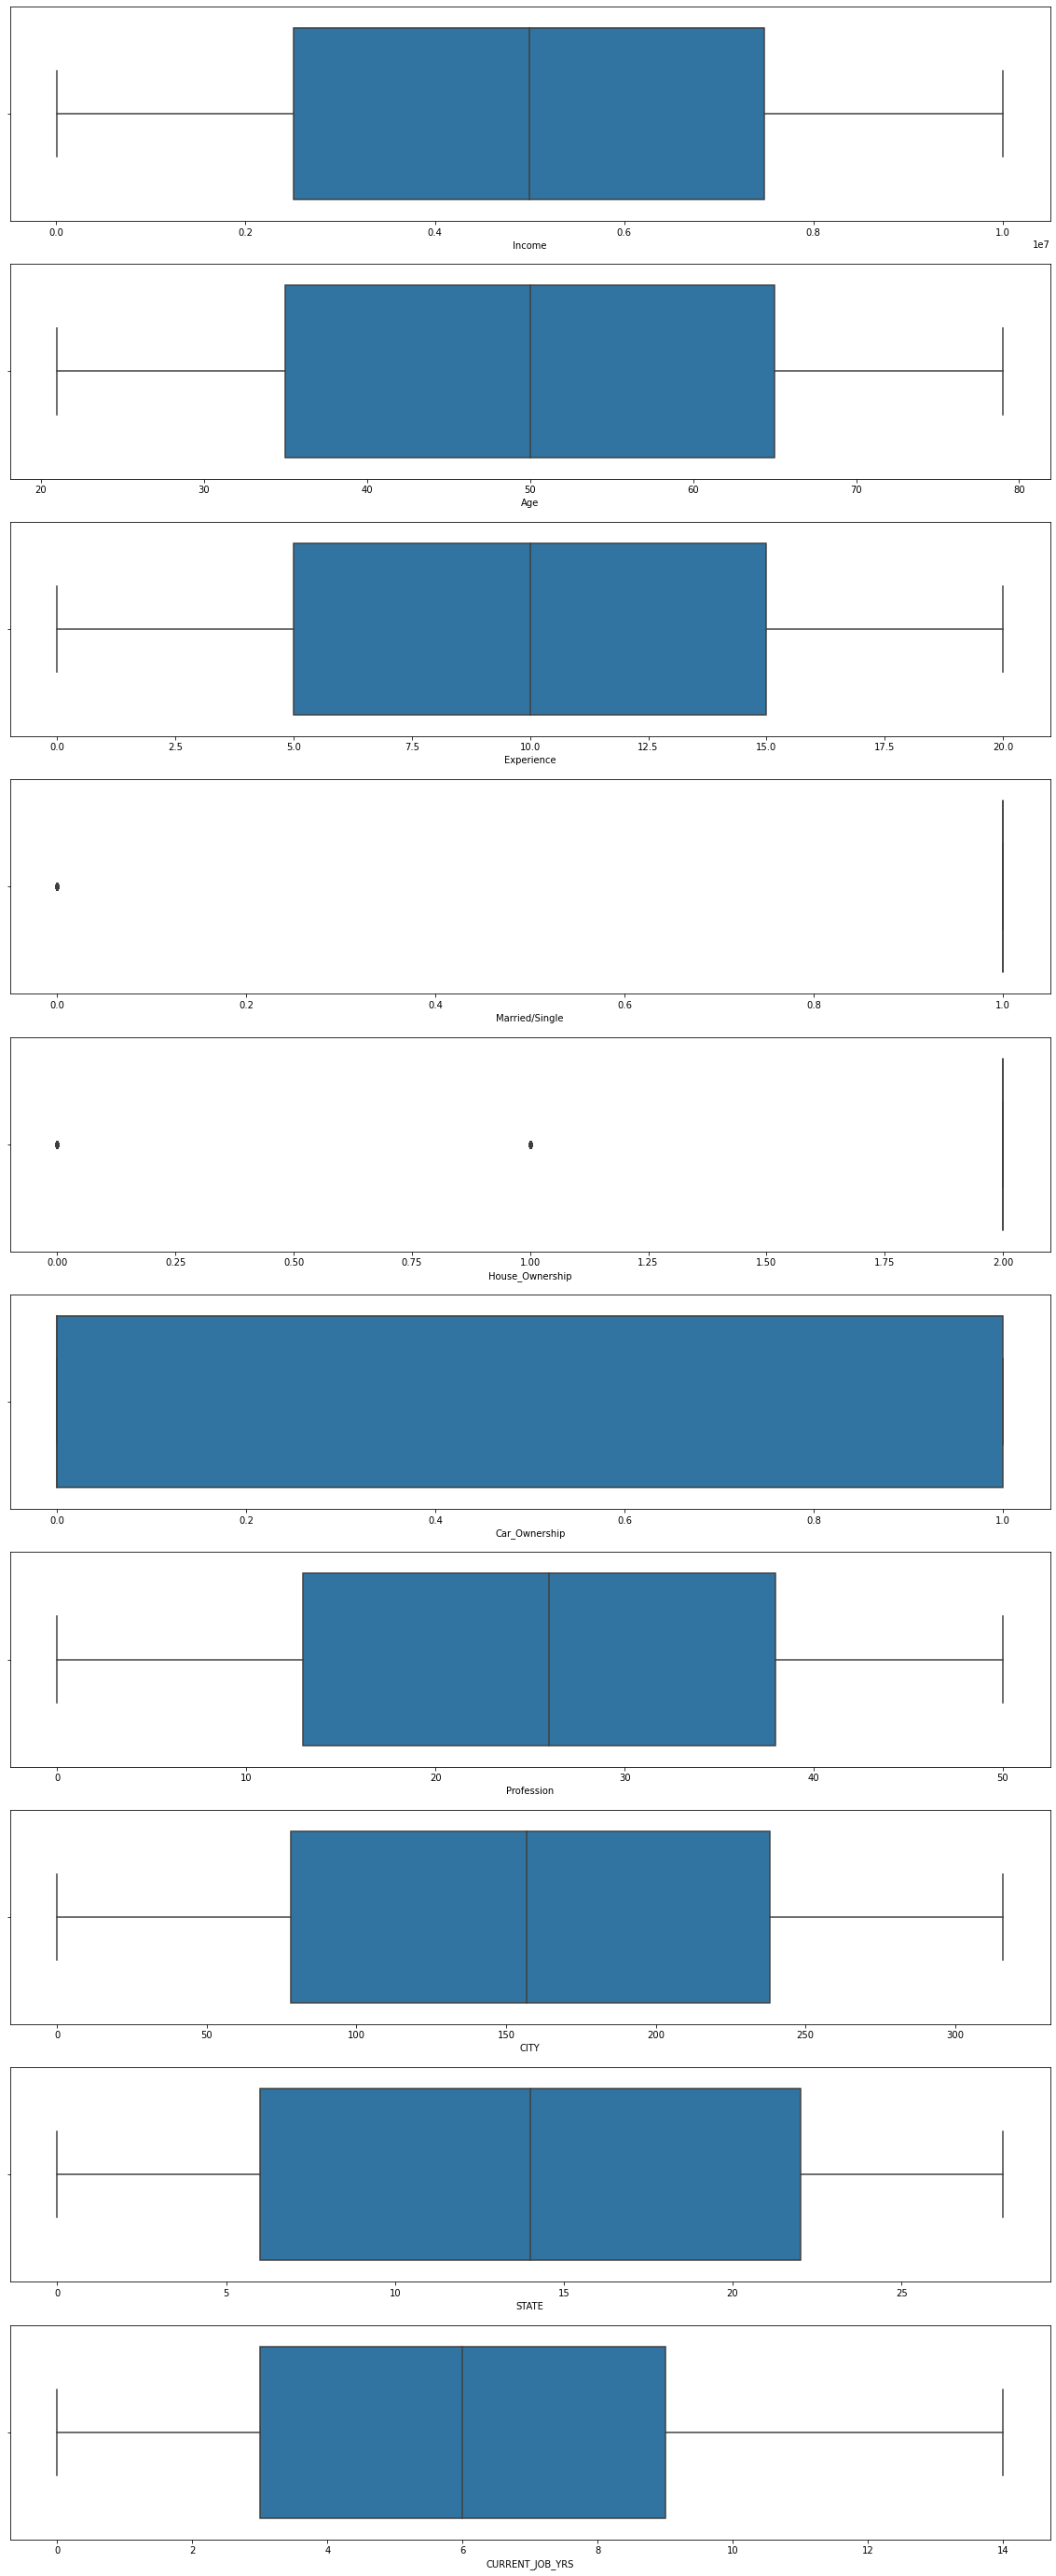

In [19]:
warnings.filterwarnings("ignore")
l = X.columns
plt.figure(figsize = (20,50))
for i in range(l.shape[0]):
    plt.subplot(l.shape[0],1,i+1)
    sns.boxplot(X[l[i]])
    #plt.text(1, 1, l[i], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.xlabel(l[i])
plt.show()

As seen by all the boxplots, our data has no outliers. Car Ownership is an entire boxplot as it is an encoded catagorical column.

#### Bivariate Analysis

In [20]:
X_numeric = X[['Income','Age','Experience','CURRENT_JOB_YRS']]
X_catag = X[['Car_Ownership','Profession','CITY','STATE','Married/Single','House_Ownership']]

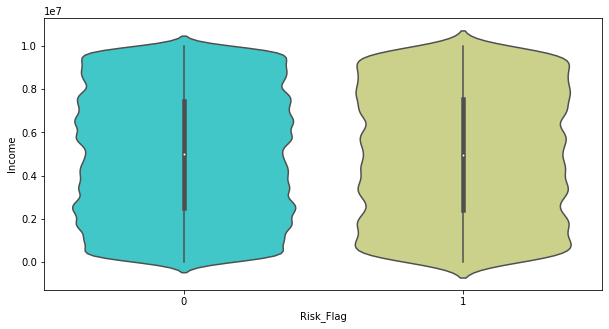

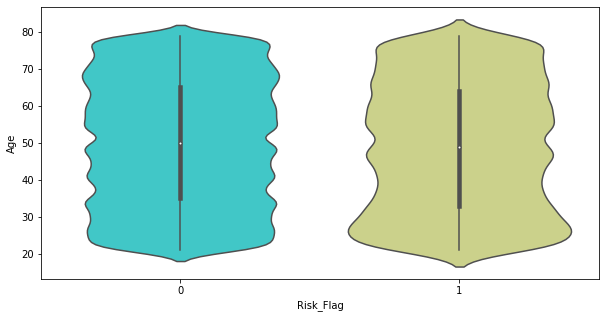

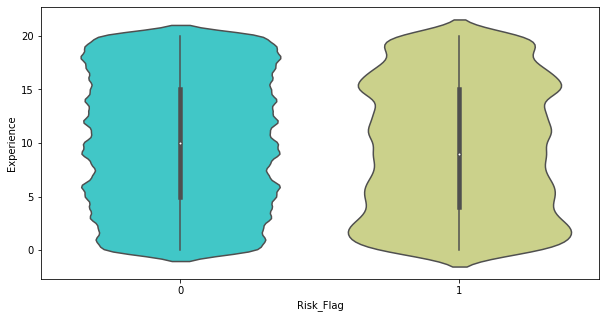

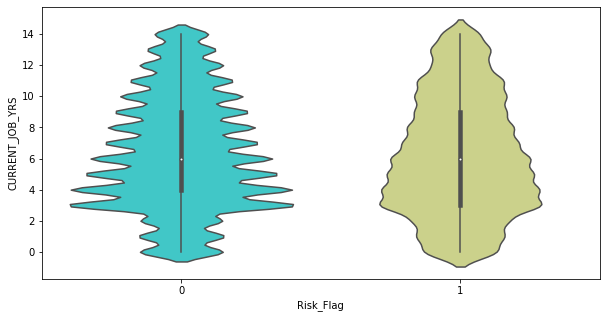

In [21]:
l = X_numeric.columns
X_temp = pd.concat([X,Y], axis = 1)
for i in l:
    plt.figure(figsize = (10,5))
    sns.violinplot(x  = 'Risk_Flag',y = i,data  = X_temp, palette='rainbow')
    plt.show()

As visible, here there are nor particular outliers. 
Inferences : 

        --> Income : There are no particular outliers. The data seems to be evenly distibuted over the 
                     two Risk_Flag variables.
        
        -->Age : The data for risk flag 1 seems to be more positively skewed than the risk_flag 0 which 
                 indicates that a younger audience is usually the one to fault on the loan.
                 
        -->Experience : Just like the AGE column, the data is more positively for risk flag 1 than 
                        the risk_flag 0 which indicates that a younger audience with less experience 
                        is usually the one to fault on the loan.
        
        --> Current Job Years : Here data is evenly distributed, there seem to be no apparent outliers.

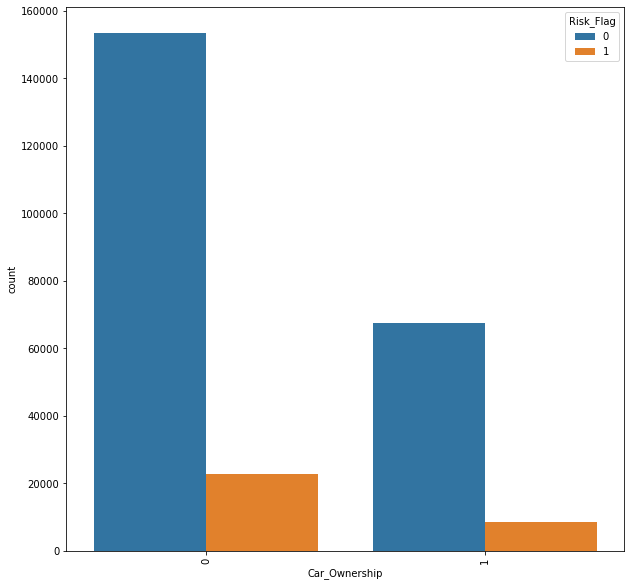

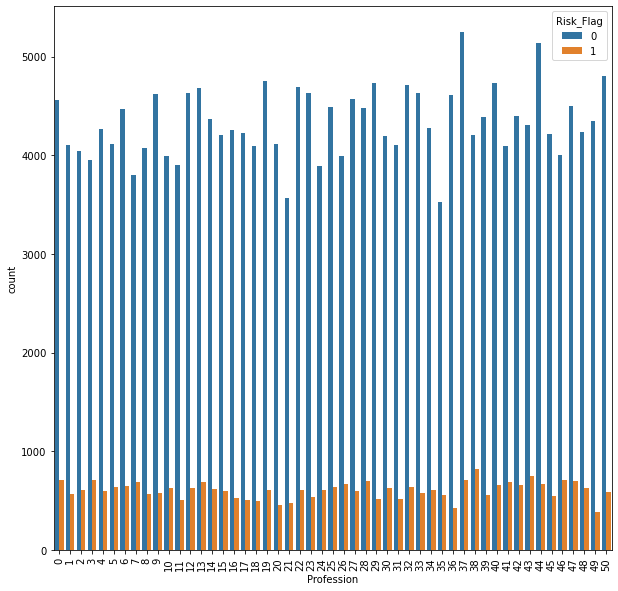

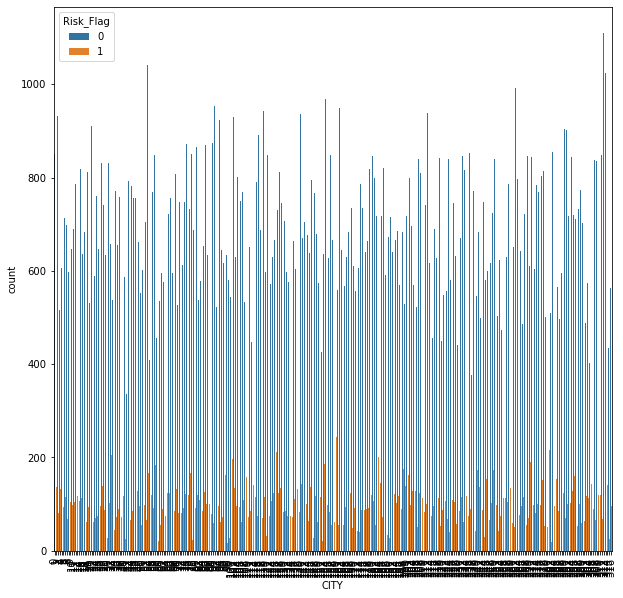

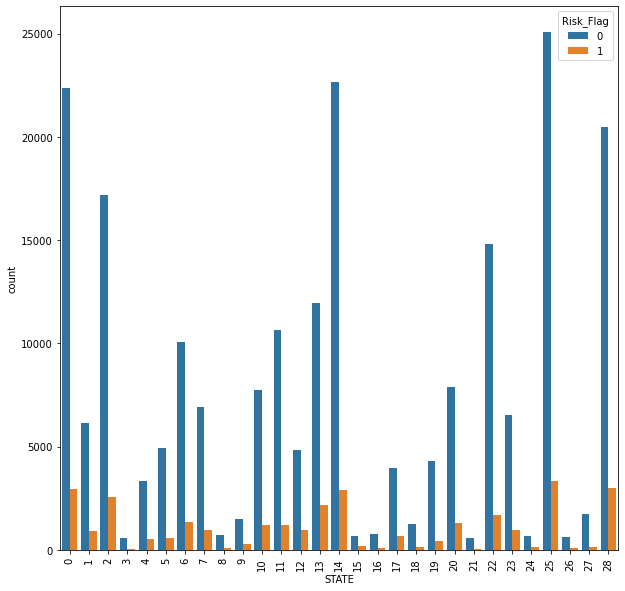

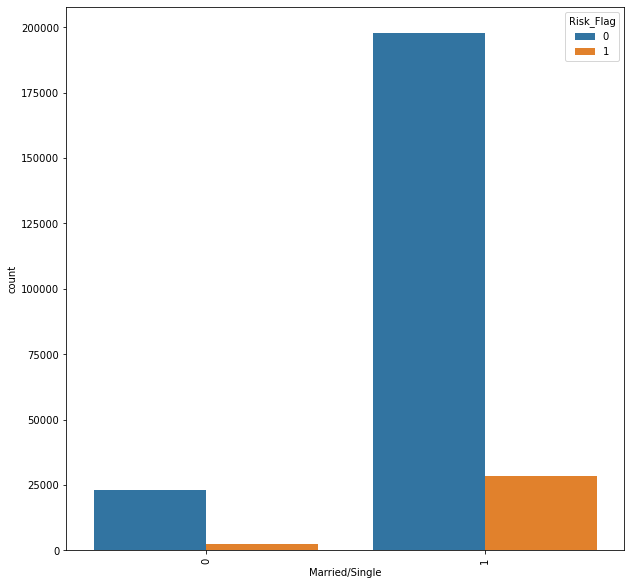

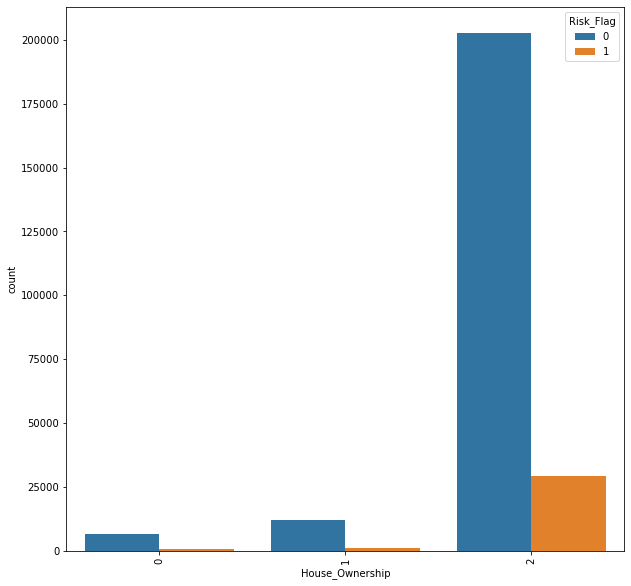

In [22]:
j = X_catag.columns
for i in j:
    plt.figure(figsize = (10,10))
    sns.countplot(x = i, hue = 'Risk_Flag', data = X_temp)
    plt.xticks(rotation = 90)

Inferences :
     
     Car_Ownership: There are more owners that have cars that have not defaulted on loans.
     
     Profession : Since there is an even distribution of the Risk_Flag, is it apparent that profession
                  seemingly does not play a huge role in detemining risk_flag i.e. there is 
                  no apparent profession that defaults on loans more.
           
     City       : Again, like the column Profession, the distibution of Risk_Flag is generally 
                  well spread out which indicates that the city of origination of the candidate does not play a mojor 
                  role in determining wheather they deafulted on a loan.
     
     STATE  : There are some states that have higher number of defaulters whereas some have extremely low
              number of defaulters. This can also because of the size of the state and the number of applicants
              from said state.
     Married/Single  : As very obvious, more number of married people are in catagory 1 of risk_flag.

#### Checking the Statistical significance of variables

<b>Checking the statistical correlation between all the numeric values and the Risk Flag</b>

In [23]:
m = X_numeric.columns
for i in m:
    print('Column Name:', i)
    coef, pval = stats.pearsonr(Y,X[i])
    print('Coefficient of Correlation of Risk Flag and',i,'is: ', coef)

Column Name: Income
Coefficient of Correlation of Risk Flag and Income is:  -0.003091168122272061
Column Name: Age
Coefficient of Correlation of Risk Flag and Age is:  -0.02180927605070726
Column Name: Experience
Coefficient of Correlation of Risk Flag and Experience is:  -0.034522612890716724
Column Name: CURRENT_JOB_YRS
Coefficient of Correlation of Risk Flag and CURRENT_JOB_YRS is:  -0.016941582052124964


As visible, none of the continuous variables have a significant enough coefficient of correlation to be of any statsitical significane on the Risk_Flag target variable.

In [24]:
o = X_catag.columns
for i in o:
    print(i,'has this many unique variables:',X[i].nunique())

Car_Ownership has this many unique variables: 2
Profession has this many unique variables: 51
CITY has this many unique variables: 317
STATE has this many unique variables: 29
Married/Single has this many unique variables: 2
House_Ownership has this many unique variables: 3


#### Checking the column 'Car Ownership'

In [25]:
X_temp = pd.concat([X,Y], axis = 1)
no = X_temp[X_temp['Car_Ownership'] == 0].Risk_Flag
yes = X_temp[X_temp['Car_Ownership'] == 1].Risk_Flag

In [26]:
stats.mannwhitneyu(no,yes)

MannwhitneyuResult(statistic=6803038000.0, pvalue=1.6017575404711396e-33)

Since the P-Value is less than 0.05, we can conclude that car ownership does have an impact on the overall risk flag.

#### Checking the Column Married/Single

In [27]:
X_temp['Married/Single'].value_counts()

1    226272
0     25728
Name: Married/Single, dtype: int64

In [28]:
single = X_temp[X_temp['Married/Single'] == 1].Risk_Flag
married =  X_temp[X_temp['Married/Single'] == 0].Risk_Flag

In [29]:
stats.mannwhitneyu(single,married)

MannwhitneyuResult(statistic=2977359552.0, pvalue=3.391186781161513e-26)

As obvious, the P-value of the non parametric T-Test is far below 0.05, it is obvious that the marital status does have a significant impact on Risk Flag.

#### Checking the Column House_Ownership

In [30]:
X_temp['House_Ownership'].value_counts()

2    231898
1     12918
0      7184
Name: House_Ownership, dtype: int64

In [31]:
rented = X_temp[X_temp['House_Ownership'] == 2].Risk_Flag
owned = X_temp[X_temp['House_Ownership'] == 1].Risk_Flag
none = X_temp[X_temp['House_Ownership'] == 0].Risk_Flag

In [32]:
stats.kruskal(rented,owned,none)

KruskalResult(statistic=182.98851524081977, pvalue=1.838860523998463e-40)

As visible by the Kruskal Wallis H Test, the medians of all the three distibutions is not the same which indicates that the statis of House Ownership of a candidate does have a significant impact on the Risk Flag. 

## Feature Engineering

#### Scaling the data

Here, some variables have incredibly large ranges and some are extremely small compared to their counterparts. We therefore scale the data for further examination.

In [33]:
sc = StandardScaler()
scaled = sc.fit_transform(X)
print(scaled)

[[-1.28314486 -1.57960351 -1.18023232 ...  1.00716661 -0.08631328
  -0.91413083]
 [ 0.89545724 -0.58334364 -0.01406671 ...  0.74686731  0.02038432
   0.73103635]
 [-0.3492686   0.94034792 -1.01363724 ... -1.62836384 -0.19301089
  -0.6399363 ]
 ...
 [-0.16491255 -0.23172251 -0.51385197 ... -0.15333445  0.02038432
   0.18264729]
 [ 0.5246182  -0.29032603 -1.68001759 ...  0.81194213  0.44717475
  -1.73671442]
 [ 1.41510816  1.17476201  1.15209891 ... -1.43313936  0.87396518
   0.18264729]]


In [34]:
X.head()
h = X.columns

In [35]:
X = pd.DataFrame(scaled, columns = h)
X.head()


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS
0,-1.283145,-1.579604,-1.180232,0.337200,0.276304,-0.657129,0.524374,1.007167,-0.086313,-0.914131
1,0.895457,-0.583344,-0.014067,0.337200,0.276304,-0.657129,1.203330,0.746867,0.020384,0.731036
2,-0.349269,0.940348,-1.013637,-2.965599,0.276304,-0.657129,1.474912,-1.628364,-0.193011,-0.639936
3,0.437526,-0.524740,-1.346827,0.337200,0.276304,1.521772,1.203330,-1.129457,0.340477,-1.188325
4,0.268128,-0.173119,0.152528,0.337200,0.276304,-0.657129,-0.969327,1.495228,0.873965,-0.914131


In [36]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS
0,-1.283145,-1.579604,-1.180232,0.337200,0.276304,-0.657129,0.524374,1.007167,-0.086313,-0.914131
1,0.895457,-0.583344,-0.014067,0.337200,0.276304,-0.657129,1.203330,0.746867,0.020384,0.731036
2,-0.349269,0.940348,-1.013637,-2.965599,0.276304,-0.657129,1.474912,-1.628364,-0.193011,-0.639936
3,0.437526,-0.524740,-1.346827,0.337200,0.276304,1.521772,1.203330,-1.129457,0.340477,-1.188325
4,0.268128,-0.173119,0.152528,0.337200,0.276304,-0.657129,-0.969327,1.495228,0.873965,-0.914131


#### Transforming any Required Variables

Since we do not require the data to be normal for our Classification techniques, we will not normalize the data as this may result in the distruption of the structure and values of the data.

#### Feature selection

In [37]:
X_temp = pd.concat([X,Y],axis = 1)
X_temp.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,Risk_Flag
0,-1.283145,-1.579604,-1.180232,0.337200,0.276304,-0.657129,0.524374,1.007167,-0.086313,-0.914131,0
1,0.895457,-0.583344,-0.014067,0.337200,0.276304,-0.657129,1.203330,0.746867,0.020384,0.731036,0
2,-0.349269,0.940348,-1.013637,-2.965599,0.276304,-0.657129,1.474912,-1.628364,-0.193011,-0.639936,0
3,0.437526,-0.524740,-1.346827,0.337200,0.276304,1.521772,1.203330,-1.129457,0.340477,-1.188325,1
4,0.268128,-0.173119,0.152528,0.337200,0.276304,-0.657129,-0.969327,1.495228,0.873965,-0.914131,1


In [38]:
X_temp = X.values
Y_temp = Y.astype(int)

print(X_temp.shape,Y_temp.shape)

(252000, 10) (252000,)


In [39]:
dt = DecisionTreeClassifier(random_state=15, criterion='entropy',max_depth=10)
dt.fit(X_temp,Y_temp)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [40]:
fi = []
fi_col = []
for i,column in enumerate(X):
    print('The Feature importance of',column,'is :',dt.feature_importances_[i])
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The Feature importance of Income is : 0.2527463197786958
The Feature importance of Age is : 0.1263635140229709
The Feature importance of Experience is : 0.07078303532103378
The Feature importance of Married/Single is : 0.027102995930241642
The Feature importance of House_Ownership is : 0.015627519738355463
The Feature importance of Car_Ownership is : 0.015964479883379096
The Feature importance of Profession is : 0.1313527448427972
The Feature importance of CITY is : 0.18499267000883765
The Feature importance of STATE is : 0.12226976361091056
The Feature importance of CURRENT_JOB_YRS is : 0.052796956862777904


In [41]:
fis = pd.DataFrame(zip(fi_col,fi), columns = ['Column','Feature Importance'])
fis.sort_values('Feature Importance',ascending = False)
#fis['Feature Importance'].sum()

,Column,Feature Importance
0,Income,0.252746
7,CITY,0.184993
6,Profession,0.131353
1,Age,0.126364
8,STATE,0.122270
2,Experience,0.070783
9,CURRENT_JOB_YRS,0.052797
3,Married/Single,0.027103
5,Car_Ownership,0.015964
4,House_Ownership,0.015628


According to the information gain of the desicion tree classifier, the variables current job years and car ownership are not very usefull features to the classifier model. 
We therefore drop House_Ownership as it is not very usefull to our model.

In [42]:
X.drop(columns = ['House_Ownership'], axis = 1, inplace  =True)

We now have our final data ready for the creating and running machine learning models. At this point we conclude our Feature Trasformation, Feature Scaling and Feature selection criterias.

#### Treating Class Imbalance 

<AxesSubplot:>

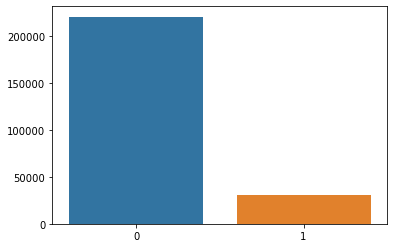

In [43]:
b = Y.value_counts()
sns.barplot(x = b.index,y = b.values)

As visible, our data is highly imbalanced. This imbalance can make our Machine Learning models redundant as we do not have an equal number of Positive or Nigative binary classficications.

In [44]:
sm = SMOTE()
#splitting the data into training and test data
seed  = 1
test_size = 0.3
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= test_size,random_state= seed, stratify = Y)

In [45]:
Y_train.value_counts()

0    154703
1     21697
Name: Risk_Flag, dtype: int64

As visible, the data is still imbalances, so we balance it using SMOTE

In [46]:
X_train_res, Y_train_res = sm.fit_resample(X_train,Y_train)

In [47]:
Y_train_res.value_counts()

0    154703
1    154703
Name: Risk_Flag, dtype: int64

As visible the dataset is now balanced using the Over Sampling Techinque of SMOTE(Synthetic Minority Oversampling Technique)

<AxesSubplot:>

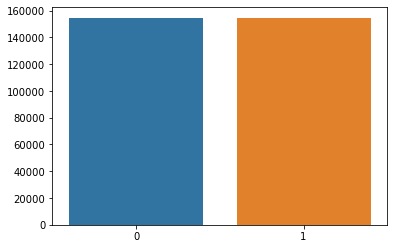

In [48]:
b = Y_train_res.value_counts()
sns.barplot(x = b.index,y = b.values)

## Assumptions

#### Assumptions for Logistic regression

1)First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

2)Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

3)Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

4)Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

5)Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).

In [49]:
#1
Y_train_res.value_counts()

0    154703
1    154703
Name: Risk_Flag, dtype: int64

In [50]:
#2
X_temp = pd.concat([X_train_res,Y_train_res],axis =1)
X_temp.nunique()

Income             62764
Age                29737
Experience         24741
Married/Single         2
Car_Ownership          3
Profession         29341
CITY               30753
STATE              24051
CURRENT_JOB_YRS    22465
Risk_Flag              2
dtype: int64

In [51]:
#3
#Checking for multicolleniarty in our independant variables
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_res.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_res.values, i) for i in range(len(X_train_res.columns))]

vif_data

,feature,VIF
0,Income,1.000633
1,Age,1.001845
2,Experience,1.812449
3,Married/Single,1.000994
4,Car_Ownership,1.002153
5,Profession,1.001146
6,CITY,1.004419
7,STATE,1.003888
8,CURRENT_JOB_YRS,1.812860


In [52]:
#4logistic regression assumes linearity of independent variables and log odds. although this analysis
#does not require the dependent and independent variables to be related linearly, 
#it requires that the independent variables are linearly related to the log odds.
def check_linearity(x1, df, title, y1):
    
    sns.regplot(x = x1, y= y1, data= df, logistic= True).set_title(title)
    plt.show()

In [53]:
X_temp = pd.concat([X,Y],axis = 1)
X_temp.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,Risk_Flag
0,-1.283145,-1.579604,-1.180232,0.337200,-0.657129,0.524374,1.007167,-0.086313,-0.914131,0
1,0.895457,-0.583344,-0.014067,0.337200,-0.657129,1.203330,0.746867,0.020384,0.731036,0
2,-0.349269,0.940348,-1.013637,-2.965599,-0.657129,1.474912,-1.628364,-0.193011,-0.639936,0
3,0.437526,-0.524740,-1.346827,0.337200,1.521772,1.203330,-1.129457,0.340477,-1.188325,1
4,0.268128,-0.173119,0.152528,0.337200,-0.657129,-0.969327,1.495228,0.873965,-0.914131,1


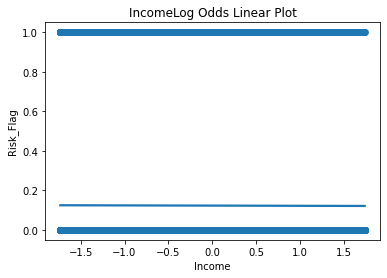

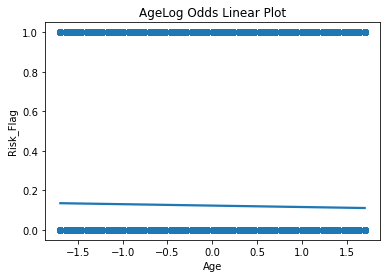

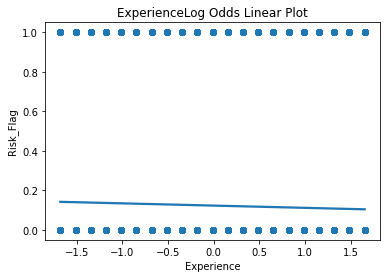

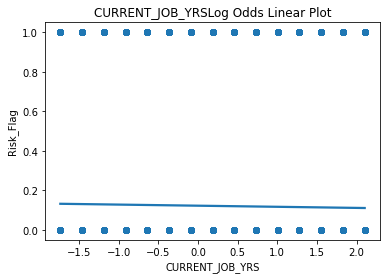

In [54]:
l = X_numeric.columns
target = 'Risk_Flag'
for i in l:
    title = i + 'Log Odds Linear Plot'
    sns.regplot(x = i, y = 'Risk_Flag', data = X_temp).set_title (title)
    plt.show()

In [55]:
#5 Large Sample Size
X_train_res.shape

(309406, 9)

### Our Final data for model building and testing are:

<ol>
    <li> Training Independent Variable (SMOTED) - X_train_res</li>
    <li> Training Dependent Variable (SMOTED) - Y_train_res </li>
    <li> Test Data Independent Variables - X_test </li>
    <li> Test Data Dependent Variable - Y_test </li>
    
  </ol>

#### Assumptions of the Decision Tree Model

1)At the beginning, we consider the whole training set as the root.

2)Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.

3)On the basis of attribute values records are distributed recursively.

4)We use statistical methods for ordering attributes as root or the internal node.

#### Assumption 1

The library Decision Tree Classifier, assumes the entire X Train Data at the root node and then uses each variable at the root node. It then finds the one with the highest Information Gain and uses that as the root node.

#### Assumption 2

In [56]:
Y_train_res.value_counts()

0    154703
1    154703
Name: Risk_Flag, dtype: int64

As visible, the Target Variable is Catagorical in nature and has two binary categories to predict.

#### Assumption 3

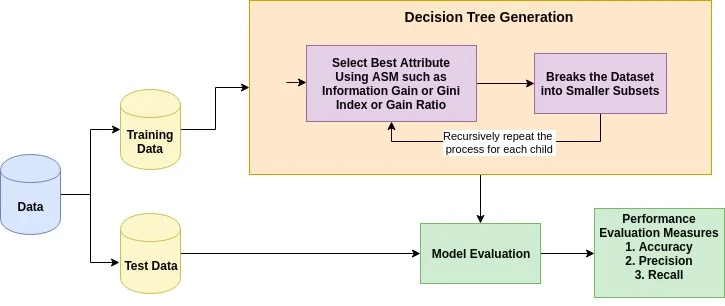

Here, as visible by the flowchart of the model, the record of each step (depth) of the decision tree algorithm are distibured recursively. This satisfies the third assumption of the Decision Tree Algorithm.

#### Assumption 4

In this case, the library DecisionTreeClassifier uses the statistical measure of entropy and Information Gain which is specified in it's paramters. This statisitcal measure is used to assign the root node, thus satisfying the fourt condition.

### Creating Important Functions for our models

##### Plotting ROC_AUC CURVE 

In [57]:
def plot_roc(model):
    from sklearn.metrics import roc_auc_score
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(Y_test, y_pred_prob),4)))
    plt.grid(True)

##### This curve gives us the TPR anf FPR for different models.

##### Confusion Matrix Visualisation

In [58]:
def plot_confusion_matrix(model):
    from matplotlib.colors import ListedColormap
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

##### This code gives us the confusion matrix of our model on our test data.

### Logistic Regression Model

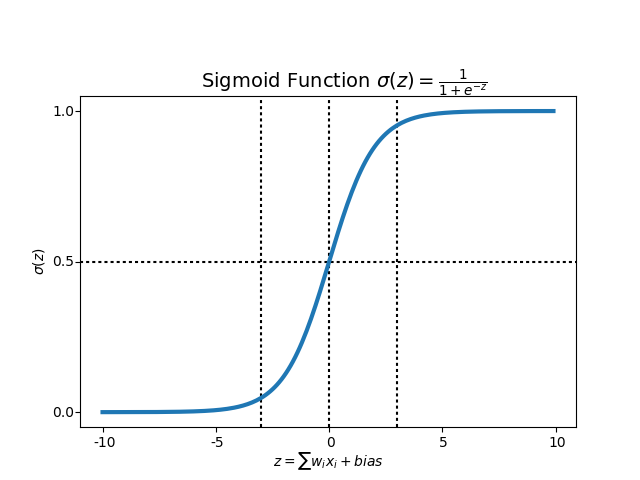

<p>The logistic regression functions is one of the most widely used classification algorithms. It uses the sigmoid function to predict the binary probability of 0 or 1. It uses the Maximum Likelyhood Estimator and the Logistic Function to convert this into a model understandable by the computer. </p>
<p>We currently use this model despite noticing that two of the five assumptions of this model have failed on our data-set. This is because this model provides us with a good base estimation of how a classification model would work on this datset.</p>

In [91]:
lr = LogisticRegression(penalty='l2')

In [92]:
lr.fit(X_train_res,Y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
sklearn.set_config(print_changed_only=False)
print ('\t\t The Parameters of the Logistic Regression Model')
lr

		 The Parameters of the Logistic Regression Model


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_train_lr_pred = lr.predict(X_train_res)
y_test_lr_pred = lr.predict(X_test)

In [95]:
print('Accuracy in predicting the Training Data:',accuracy_score(Y_train_res,y_train_lr_pred))

Accuracy in predicting the Training Data: 0.5324686657660161


In [96]:
print('Test Data Accuracy Score:',accuracy_score(Y_test,y_test_lr_pred))

Test Data Accuracy Score: 0.5104894179894179


In [97]:
print('\t   Training Data Classification Performance Metrics\n',classification_report(Y_train_res,y_train_lr_pred))
print('\t    Test Data Classification Performance Metrics\n',classification_report(Y_test , y_test_lr_pred))

	   Training Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.53      0.50      0.52    154703
           1       0.53      0.56      0.55    154703

    accuracy                           0.53    309406
   macro avg       0.53      0.53      0.53    309406
weighted avg       0.53      0.53      0.53    309406

	    Test Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.89      0.50      0.64     66301
           1       0.14      0.56      0.22      9299

    accuracy                           0.51     75600
   macro avg       0.51      0.53      0.43     75600
weighted avg       0.80      0.51      0.59     75600



In [98]:
print("Train Data Confusion Matric for Logistic Regression:\n",confusion_matrix(Y_train_res,y_train_lr_pred))
print("Test Data Confusion Metrix for Logistic Regression:\n",confusion_matrix(Y_test,y_test_lr_pred))

Train Data Confusion Matric for Logistic Regression:
 [[77975 76728]
 [67929 86774]]
Test Data Confusion Metrix for Logistic Regression:
 [[33385 32916]
 [ 4091  5208]]


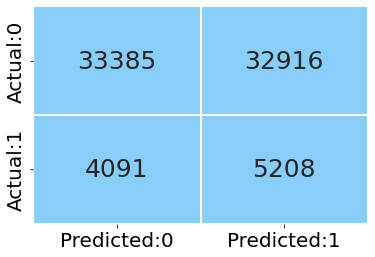

In [118]:
plot_confusion_matrix(lr)

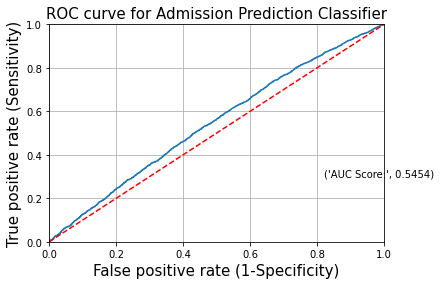

In [119]:
plot_roc(lr)

### Decision Tree Model

In [161]:
param_dt = {'max_depth':[None,2,5,10,15,20],
        'min_samples_split':[2,4,6,8,10],
        'min_samples_leaf':[1,3,5,7,8],
        'max_features':[None,3,5]}

In [160]:
dt  =DecisionTreeClassifier()

In [162]:
dt_model = RandomizedSearchCV(estimator=dt,param_distributions=param_dt,n_iter=7,random_state=12)

In [163]:
dt_model.fit(X_train_res,Y_train_res)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=None,
                                                    splitter='best'),
                   n_iter=7, n_jobs=None,
                   param_distributions={'max_depth': [None, 2, 5, 10, 15, 20],
                                        'max_features': [None, 3, 5],
                                        'min_samples_leaf': [1, 3, 5, 7, 8],
                                        'min_samples_split': [2, 4, 6, 8, 10]},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [166]:
dt_model.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_features': None,
 'max_depth': None}

In [169]:
dt = DecisionTreeClassifier(min_samples_split=4,min_samples_leaf=8)

In [170]:
dt.fit(X_train_res,Y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=8,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [171]:

print('                      Parameters of the Decision Tree Model')
dt

                      Parameters of the Decision Tree Model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=8,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [172]:
y_train_hat = dt.predict(X_train_res)

In [173]:
print('Accuracy in predicting the Training Data:',accuracy_score(Y_train_res,y_train_hat))


Accuracy in predicting the Training Data: 0.9293808135588838


In [174]:
Y_pred = dt.predict(X_test)

In [175]:
print('Test Data Accuracy Score:',accuracy_score(Y_test,Y_pred))

Test Data Accuracy Score: 0.8726190476190476


In [176]:
print('\t   Training Data Classification Performance Metrics\n',classification_report(y_train_hat , Y_train_res))
print('\t    Test Data Classification Performance Metrics\n',classification_report(Y_test , Y_pred))

	   Training Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.89      0.96      0.93    143207
           1       0.97      0.90      0.93    166199

    accuracy                           0.93    309406
   macro avg       0.93      0.93      0.93    309406
weighted avg       0.93      0.93      0.93    309406

	    Test Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.97      0.88      0.92     66301
           1       0.49      0.83      0.62      9299

    accuracy                           0.87     75600
   macro avg       0.73      0.85      0.77     75600
weighted avg       0.91      0.87      0.89     75600



In [177]:
feature_names = X_train_res.columns

In [178]:
varImp_df   = pd.DataFrame({'Feature_names' :feature_names,\
                            'Importances' : dt.feature_importances_})
varImp_df.sort_values('Importances', ascending = False) 

,Feature_names,Importances
0,Income,0.182268
5,Profession,0.160007
6,CITY,0.152228
1,Age,0.149338
2,Experience,0.109714
7,STATE,0.109362
8,CURRENT_JOB_YRS,0.101138
4,Car_Ownership,0.020353
3,Married/Single,0.015592


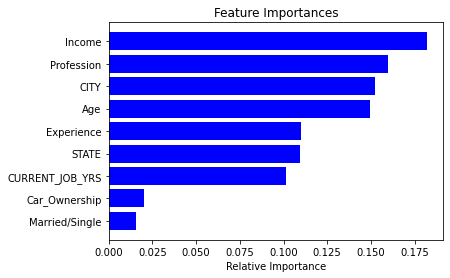

In [179]:
importances = dt.feature_importances_
indices     = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

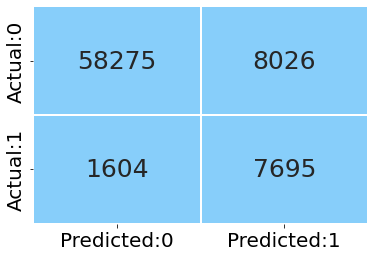

In [180]:
plot_confusion_matrix(dt)

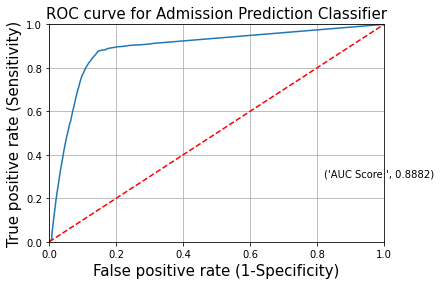

In [181]:
plot_roc(dt)

### Gradient Boost Model

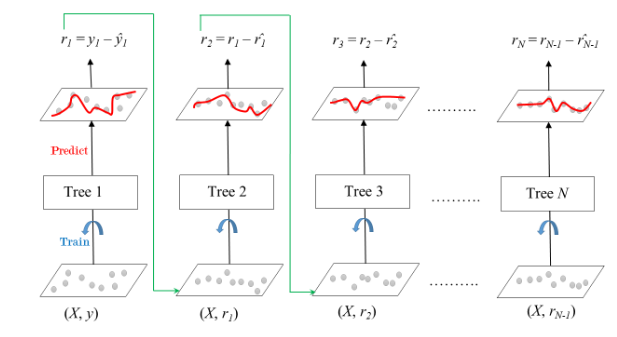

<p>Gradient Boost is a boosted machine learning algorithm. This means that each iteration of the algorithm focuses on the mistakes of the previous iteration. This algorithm typically uses Decision Trees for it's classification problems. It uses a host of multiple trees to make a prediction. It does so by predicting on the residuals of the previous iteration trees. It then scales the probability given by all the trees by the learning rate.</p>

<p>Since this model if a multiple tree Boosting algorithm, it typically beats other bagging tree algorithms such as Random Fores. </p>

In [145]:
gb = GradientBoostingClassifier(learning_rate=1.15,n_estimators=220)

In [146]:
gb.fit(X_train_res,Y_train_res)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.15, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=220, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

As visible by these parameters, we see that the number of estimators used are 220. This means that 220 seperate trees are used to build the complete boosting algorithm.

In [182]:
y_train_gb_pred = gb.predict(X_train_res)
y_test_gb_pred = gb.predict(X_test)

In [183]:
print('Accuracy in predicting the Training Data:',accuracy_score(Y_train_res,y_train_gb_pred))

Accuracy in predicting the Training Data: 0.8774522795291624


In [184]:
print('Test Data Accuracy Score:',accuracy_score(Y_test,y_test_gb_pred))

Test Data Accuracy Score: 0.8336507936507936


In [185]:
print('\t   Training Data Classification Performance Metrics\n',classification_report(Y_train_res,y_train_gb_pred))
print('\t    Test Data Classification Performance Metrics\n',classification_report(Y_test , y_test_gb_pred))

	   Training Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.90      0.85      0.87    154703
           1       0.86      0.90      0.88    154703

    accuracy                           0.88    309406
   macro avg       0.88      0.88      0.88    309406
weighted avg       0.88      0.88      0.88    309406

	    Test Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     66301
           1       0.40      0.74      0.52      9299

    accuracy                           0.83     75600
   macro avg       0.68      0.79      0.71     75600
weighted avg       0.89      0.83      0.85     75600



In [186]:
print("Train Data Confusion Matric for Logistic Regression:\n",confusion_matrix(Y_train_res,y_train_gb_pred))
print("Test Data Confusion Metrix for Logistic Regression:\n",confusion_matrix(Y_test,y_test_gb_pred))

Train Data Confusion Matric for Logistic Regression:
 [[131684  23019]
 [ 14898 139805]]
Test Data Confusion Metrix for Logistic Regression:
 [[56178 10123]
 [ 2453  6846]]


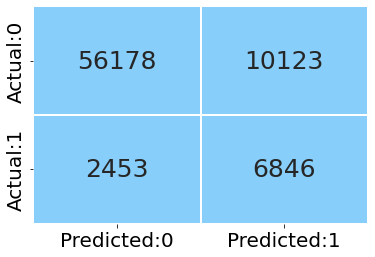

In [187]:
plot_confusion_matrix(gb)

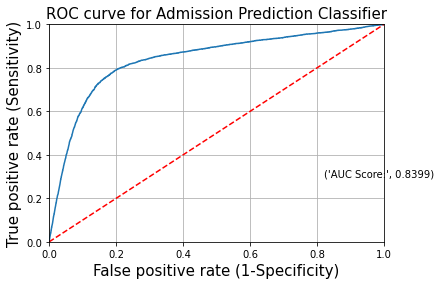

In [188]:
plot_roc(gb)

### Random Forest Model

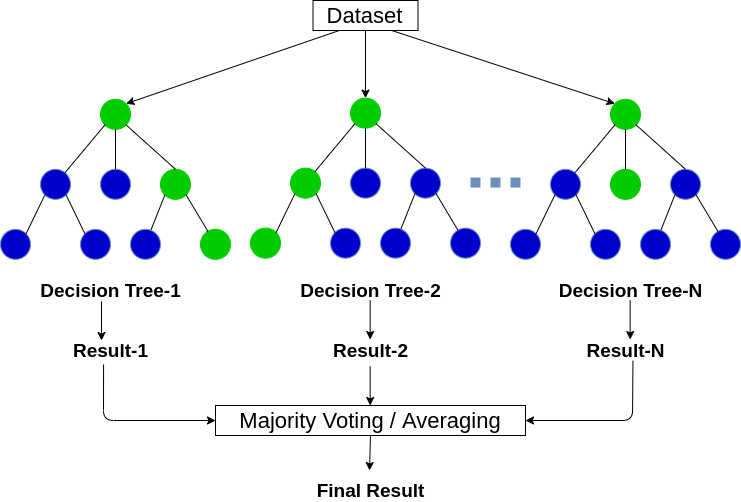

Random Forest is a bagging algorithm. It uses multiple different decision trees made on bootstrapped data. All these wek learners use their bootstrapped datasets to make a prediction on the target variable. The vote of the majority of the trees in 
the algorithm is used as the final prediction for the data.

This is done because decision trees overfit easily. This results in the model not being ready for deployment. The Random Forest avoids that problem by using bootstrapped data and multiple different trees.

In [196]:
param_rf={'n_estimators':[100,200,300],
          'max_depth':[10,15,20,25],
          'max_leaf_nodes':[2,3,5,9],
          'min_samples_split':[1,3,5,7,10],
          'min_samples_leaf':[2,3,4,5]}

In [197]:
rf = RandomForestClassifier()

In [198]:
model_rf = RandomizedSearchCV(estimator=rf,param_distributions=param_rf,n_iter=10,random_state=14)

In [199]:
model_rf.fit(X_train_res,Y_train_res)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
                                                    oob_score=False,
                                                    random_state=None,
                                                    verbose=0,
                                                    warm_start=False),
                   n_iter=10, n_jobs=None,
                   param_distributions={'max_depth': [10, 15, 20, 25],
                                        'max_leaf_nodes': [2, 3, 5, 9],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [1, 3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300]},
                   pre_dispatch='2*n_jobs', random_state=14, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [200]:
model_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 5,
 'max_depth': 15}

In [59]:
rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=4)

In [60]:
rf.fit(X_train_res,Y_train_res)

RandomForestClassifier(min_samples_leaf=4)

In [61]:
y_train_rf_pred = rf.predict(X_train_res)
y_test_rf_pred = rf.predict(X_test)

In [62]:
print('Accuracy in predicting the Training Data:',accuracy_score(Y_train_res,y_train_rf_pred))

Accuracy in predicting the Training Data: 0.9529582490320162


In [63]:
print('Test Data Accuracy Score:',accuracy_score(Y_test,y_test_rf_pred))

Test Data Accuracy Score: 0.8917857142857143


In [64]:
print('\t   Training Data Classification Performance Metrics\n',classification_report(Y_train_res,y_train_rf_pred))
print('\t    Test Data Classification Performance Metrics\n',classification_report(Y_test , y_test_rf_pred))

	   Training Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.99      0.91      0.95    154703
           1       0.92      0.99      0.95    154703

    accuracy                           0.95    309406
   macro avg       0.96      0.95      0.95    309406
weighted avg       0.96      0.95      0.95    309406

	    Test Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     66301
           1       0.54      0.78      0.64      9299

    accuracy                           0.89     75600
   macro avg       0.75      0.84      0.79     75600
weighted avg       0.91      0.89      0.90     75600



In [65]:
print("Train Data Confusion Matric for Logistic Regression:\n",confusion_matrix(Y_train_res,y_train_rf_pred))
print("Test Data Confusion Metrix for Logistic Regression:\n",confusion_matrix(Y_test,y_test_rf_pred))

Train Data Confusion Matric for Logistic Regression:
 [[141534  13169]
 [  1386 153317]]
Test Data Confusion Metrix for Logistic Regression:
 [[60201  6100]
 [ 2081  7218]]


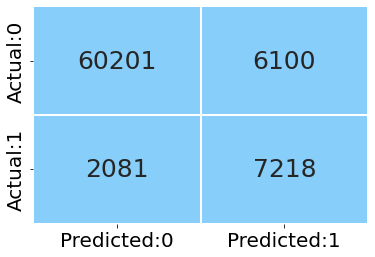

In [66]:
plot_confusion_matrix(rf)

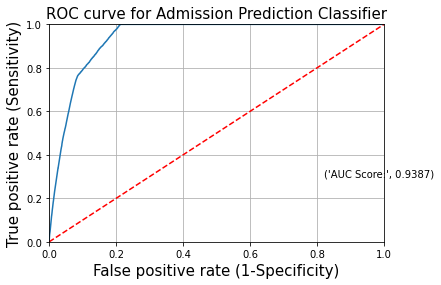

In [67]:
plot_roc(rf)

### K Nearest Neighbour Classifier

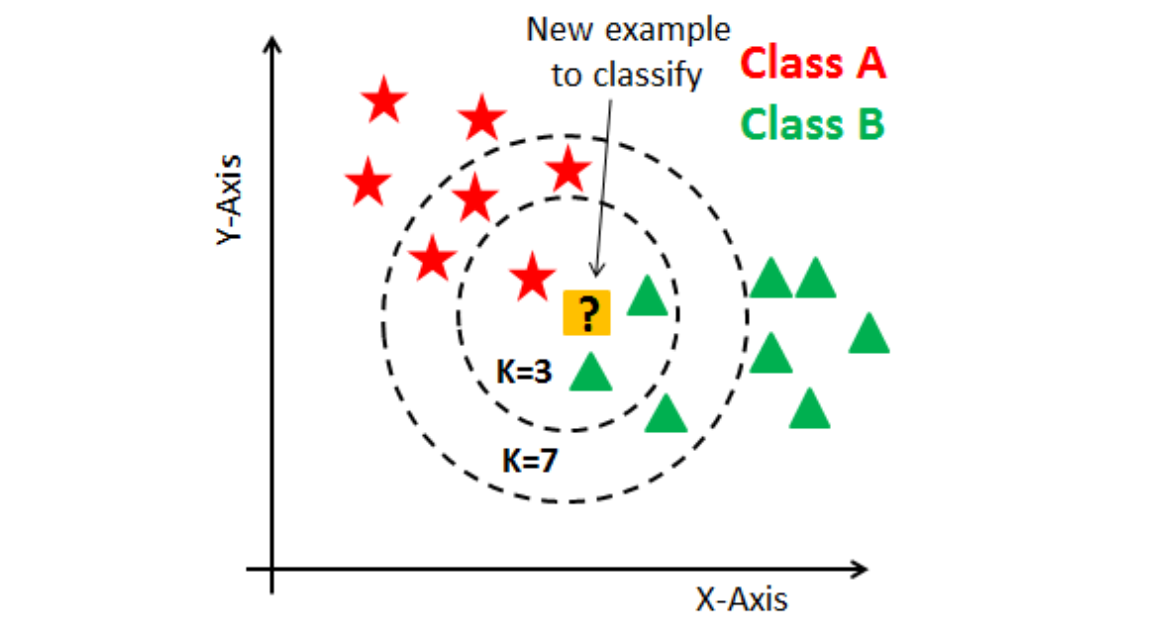

KNN Classifier classifies based on a distance metric. This is the eculidean distance metric. It calculates the eculidean distance of a grain of test data compared to all the train data and assigns it the majority class of it's nearest N neighbours. This 'N' Neighbours is a hyperparameters that is decided by the user. 

This algorithm is one of the simplest Machine Learning algorithms and is thus trained and executed fairly quick.

In [222]:
params_kn = {'n_neighbors':[3,5,7,9,np.sqrt(X_train_res.shape[0])]}

In [225]:
model_kn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_kn)

In [226]:
model_kn.fit(X_train_res,Y_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 556.2427527617775]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [227]:
model_kn.best_params_

{'n_neighbors': 9}

In [230]:
kn = KNeighborsClassifier(n_neighbors=9)

In [231]:
kn.fit(X_train_res,Y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [232]:
y_train_kn_pred = kn.predict(X_train_res)
y_test_kn_pred = kn.predict(X_test)

In [233]:
print('Accuracy in predicting the Training Data:',accuracy_score(Y_train_res,y_train_kn_pred))

Accuracy in predicting the Training Data: 0.8323335681919549


In [234]:
print('Test Data Accuracy Score:',accuracy_score(Y_test,y_test_kn_pred))

Test Data Accuracy Score: 0.8640740740740741


In [235]:
print('\t   Training Data Classification Performance Metrics\n',classification_report(Y_train_res,y_train_kn_pred))
print('\t    Test Data Classification Performance Metrics\n',classification_report(Y_test , y_test_kn_pred))

	   Training Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.79      0.91      0.84    154703
           1       0.89      0.76      0.82    154703

    accuracy                           0.83    309406
   macro avg       0.84      0.83      0.83    309406
weighted avg       0.84      0.83      0.83    309406

	    Test Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     66301
           1       0.46      0.60      0.52      9299

    accuracy                           0.86     75600
   macro avg       0.70      0.75      0.72     75600
weighted avg       0.88      0.86      0.87     75600



In [236]:
print("Train Data Confusion Matric for Logistic Regression:\n",confusion_matrix(Y_train_res,y_train_kn_pred))
print("Test Data Confusion Metrix for Logistic Regression:\n",confusion_matrix(Y_test,y_test_kn_pred))

Train Data Confusion Matric for Logistic Regression:
 [[140616  14087]
 [ 37790 116913]]
Test Data Confusion Metrix for Logistic Regression:
 [[59784  6517]
 [ 3759  5540]]


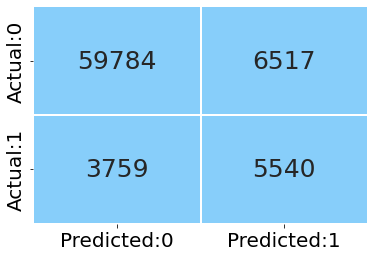

In [237]:
plot_confusion_matrix(kn)

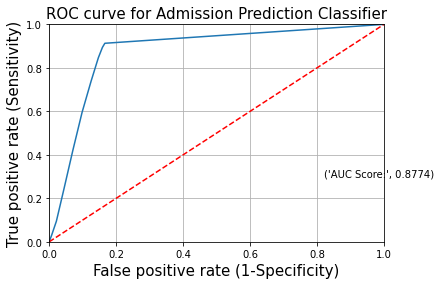

In [238]:
plot_roc(kn)

### ADA Boost Classifier

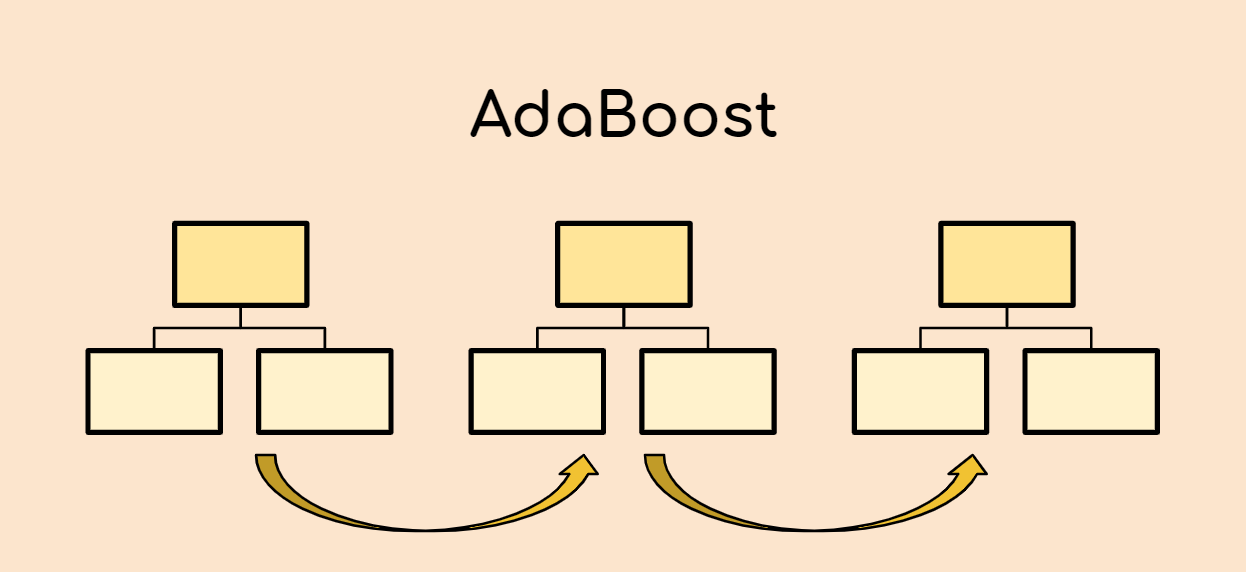

ADA Boost is a boosting machine learning algorithm. It uses a multitude of weak learners to make predictions. It uses learners called "Stumps" which are nothing but decision trees with a maximum depth of one. It intitally assigns all the grains of data an initial equal weight. Then the stump with the highest information gain is used to split the data and get an initial prediction. The total error made by a stump dictates it's amount of say in the overall prediction. Weights of those predicted right is reduced and one's which are predicted wrong are increased. Then a bootstrapped data is again generated from the cumulative weight distribution of the previous tree. This therefore focuses more on grains that were incorrectly classified.

This model therefore focuses more on the grains wrongly classified and hence is a boosting algorithm. 

In [240]:
param_ad = {'n_estimators':[50,100,150,200]}

In [241]:
model_ad = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_ad)

In [242]:
model_ad.fit(X_train_res,Y_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             n_jobs=None, param_grid={'n_estimators': [50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [243]:
model_ad.best_params_

{'n_estimators': 200}

In [244]:
ad = AdaBoostClassifier(n_estimators=200)

In [245]:
ad.fit(X_train_res,Y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [246]:
y_train_ad_pred = ad.predict(X_train_res)
y_test_ad_pred = ad.predict(X_test)

In [247]:
print('Accuracy in predicting the Training Data:',accuracy_score(Y_train_res,y_train_ad_pred))

Accuracy in predicting the Training Data: 0.6050496758304622


In [248]:
print('Test Data Accuracy Score:',accuracy_score(Y_test,y_test_ad_pred))

Test Data Accuracy Score: 0.5982142857142857


In [249]:
print('\t   Training Data Classification Performance Metrics\n',classification_report(Y_train_res,y_train_ad_pred))
print('\t    Test Data Classification Performance Metrics\n',classification_report(Y_test , y_test_ad_pred))

	   Training Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.60      0.61      0.61    154703
           1       0.61      0.60      0.60    154703

    accuracy                           0.61    309406
   macro avg       0.61      0.61      0.61    309406
weighted avg       0.61      0.61      0.61    309406

	    Test Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.90      0.61      0.73     66301
           1       0.15      0.51      0.24      9299

    accuracy                           0.60     75600
   macro avg       0.53      0.56      0.48     75600
weighted avg       0.81      0.60      0.67     75600



In [250]:
print("Train Data Confusion Matric for Logistic Regression:\n",confusion_matrix(Y_train_res,y_train_ad_pred))
print("Test Data Confusion Metrix for Logistic Regression:\n",confusion_matrix(Y_test,y_test_ad_pred))

Train Data Confusion Matric for Logistic Regression:
 [[94599 60104]
 [62096 92607]]
Test Data Confusion Metrix for Logistic Regression:
 [[40492 25809]
 [ 4566  4733]]


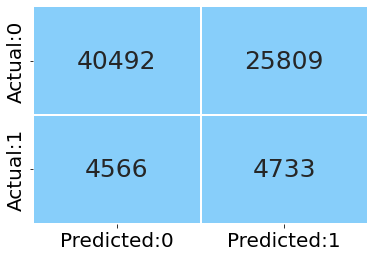

In [251]:
plot_confusion_matrix(ad)

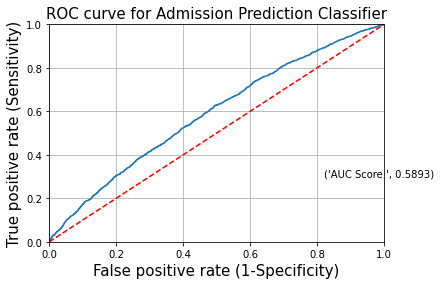

In [252]:
plot_roc(ad)

### XGBoost Model

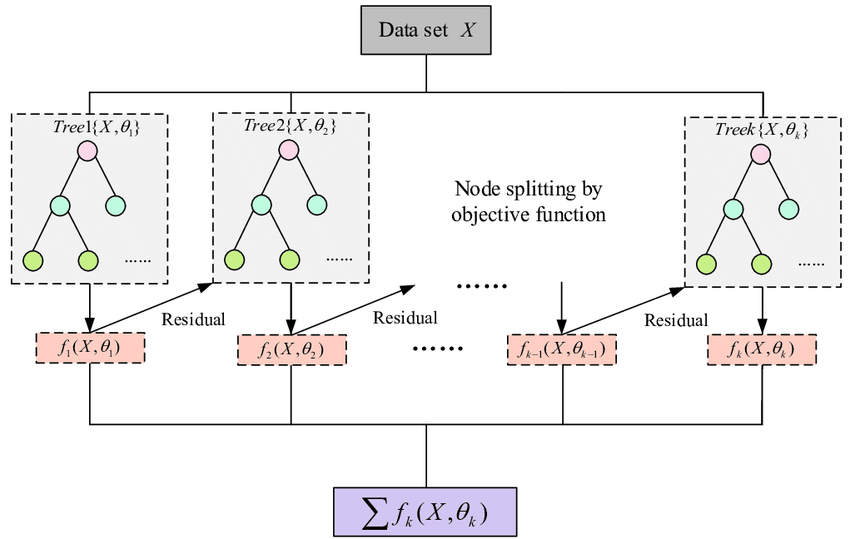

In [259]:
xg=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=3000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)

In [260]:
xg.fit(X_train_res,Y_train_res)

[17:55:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_cat_threshold" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=3000, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

In [261]:
y_train_xg_pred = xg.predict(X_train_res)
y_test_xg_pred = xg.predict(X_test)

In [262]:
print('Accuracy in predicting the Training Data:',accuracy_score(Y_train_res,y_train_xg_pred))

Accuracy in predicting the Training Data: 0.8616639625605191


In [263]:
print('Test Data Accuracy Score:',accuracy_score(Y_test,y_test_xg_pred))

Test Data Accuracy Score: 0.8375529100529101


In [264]:
print('\t   Training Data Classification Performance Metrics\n',classification_report(Y_train_res,y_train_xg_pred))
print('\t    Test Data Classification Performance Metrics\n',classification_report(Y_test , y_test_xg_pred))

	   Training Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.86      0.86      0.86    154703
           1       0.86      0.86      0.86    154703

    accuracy                           0.86    309406
   macro avg       0.86      0.86      0.86    309406
weighted avg       0.86      0.86      0.86    309406

	    Test Data Classification Performance Metrics
               precision    recall  f1-score   support

           0       0.95      0.86      0.90     66301
           1       0.40      0.67      0.51      9299

    accuracy                           0.84     75600
   macro avg       0.68      0.77      0.70     75600
weighted avg       0.88      0.84      0.85     75600



In [265]:
print("Train Data Confusion Matric for Logistic Regression:\n",confusion_matrix(Y_train_res,y_train_xg_pred))
print("Test Data Confusion Metrix for Logistic Regression:\n",confusion_matrix(Y_test,y_test_xg_pred))

Train Data Confusion Matric for Logistic Regression:
 [[133414  21289]
 [ 21513 133190]]
Test Data Confusion Metrix for Logistic Regression:
 [[57052  9249]
 [ 3032  6267]]


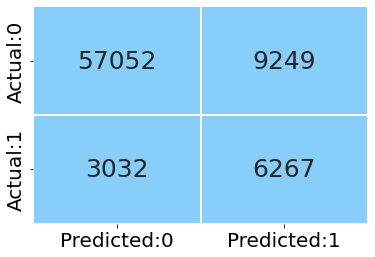

In [266]:
plot_confusion_matrix(xg)

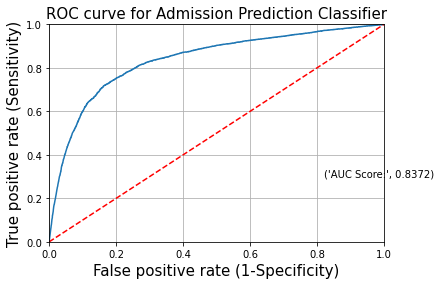

In [267]:
plot_roc(xg)

## Evaluating and Drawing Inferences of all the models

In [269]:
i = [lr,dt,rf,gb,ad,kn,xg]

In [270]:
model_name = []
model_accuracy = []
model_precision = []
model_recall = []
model_f1score = []
overall = pd.DataFrame()
for h in i:
    if (h == lr):
        name = 'Logistic Regression Model'
    elif (h == rf):
        name = 'Random Forest Model'
    elif (h == gb):
        name = 'Gradient Boost Model'
    elif (h == ad):
        name = 'ADA Boost Model'
    elif (h == dt):
        name = 'Decision Tree Model'
    elif (h == kn):
        name = 'K Nearest Neighbour Model'
    elif (h == xg):
        name = 'XG Boost Model'
        
        
    y_pred = h.predict(X_test)
    acc = accuracy_score(Y_test,y_pred)
    pre = precision_score(Y_test,y_pred)
    rec = recall_score(Y_test,y_pred)
    f1 = f1_score(Y_test,y_pred)
    model_name.append(name)
    model_accuracy.append(acc)
    model_precision.append(pre)
    model_recall.append(rec)
    model_f1score.append(f1)


overall['Name'] = model_name
overall['Accuracy'] = model_accuracy
overall['Precision'] = model_precision
overall['Recall'] = model_recall
overall['F1 Score'] = model_f1score

In [271]:
overall

,Name,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Model,0.510489,0.136607,0.560060,0.219640
1,Decision Tree Model,0.872619,0.489473,0.827508,0.615108
2,Random Forest Model,0.891693,0.541770,0.774814,0.637667
3,Gradient Boost Model,0.833651,0.403442,0.736208,0.521243
4,ADA Boost Model,0.598214,0.154967,0.508979,0.237594
5,K Nearest Neighbour Model,0.864074,0.459484,0.595763,0.518824
6,XG Boost Model,0.837553,0.403906,0.673943,0.505098


<AxesSubplot:xlabel='Accuracy', ylabel='Name'>

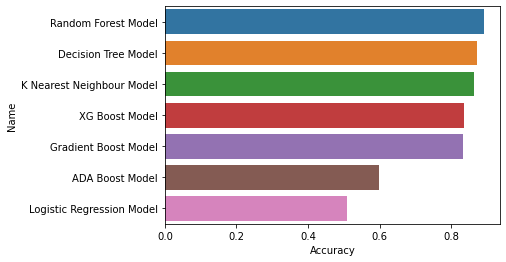

In [274]:
a = overall.sort_values(by = 'Accuracy',ascending=False)
sns.barplot(y=a['Name'],x = a['Accuracy'])

<AxesSubplot:xlabel='Precision', ylabel='Name'>

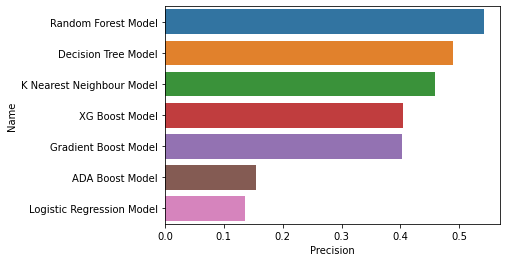

In [275]:
p = overall.sort_values(by = 'Precision',ascending=False)
sns.barplot(y=p['Name'],x = p['Precision'])

<AxesSubplot:xlabel='Recall', ylabel='Name'>

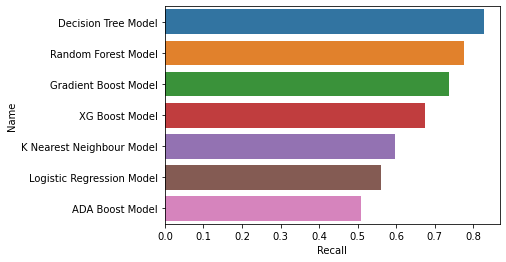

In [277]:
r = overall.sort_values(by = 'Recall',ascending=False)
sns.barplot(y=r['Name'],x = r['Recall'])

<AxesSubplot:xlabel='F1 Score', ylabel='Name'>

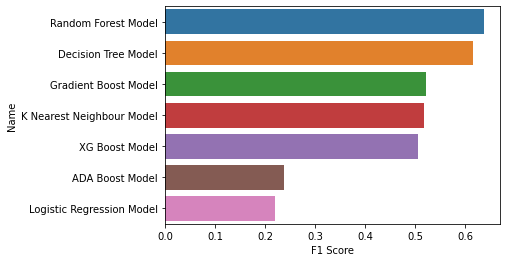

In [278]:
f = overall.sort_values(by = 'F1 Score',ascending=False)
sns.barplot(y=f['Name'],x = f['F1 Score'])

<p>It is visible that the random forest model presents the overall highest accuracy, precision and F1 score. </p>

<h1>We therefore choose the random forest model as our model for deployment.</h1>

<b>A thorough breakdown of the random forest model.</b>

In [71]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

These are the paramters of the randomf forest model.

In [76]:
rf_imp = pd.DataFrame(zip(X_train_res.columns,rf.feature_importances_), columns=['Feature Name','Importance']).sort_values(by = 'Importance', ascending=False)

<AxesSubplot:xlabel='Importance', ylabel='Feature Name'>

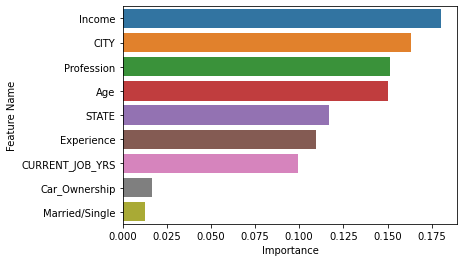

In [77]:
sns.barplot(y=rf_imp['Feature Name'],x=rf_imp['Importance'])

These are the feature importances according to the random forest model. Inferences:
<ol>
    <li>Income in said to be the most important feature. This means that income provides the highest information gain when decision trees are split on it.</li>
    <li>The most important features are considered to be Income,City,Profession and Age. This goes to show that the place of origin, culture and profession and age go a long way in predicting the reliabilty of a candidate. Eventhough these features are not numerically represnting past financial history, they are still important when it comes to considering the reliability of a customer.</li>
    <li>The two least significant features seems to be 'Car Ownership' and 'Married/Single'.</li>